In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import glob
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)
#TODO : fix axis (1.0 for all)
dic_df = {}

modeles = []
for file in glob.glob("annotated_data/generations_*_trf.csv"):
    df = pd.read_csv(file)
    modele = file.split("_")[-5].split(".")[0]
    modeles.append(modele)
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

,Unnamed: 0.1,Unnamed: 0,fichier_ref,pathologie,generation,input,sex_prompt,age_prompt,respect_contraintes,Identified_gender,Detailed_counter,Detailed_markers,model
0,0,0,filepdf-56-cas_prostate,prostate,"Une femme de 49 ans, a été adressée en urologi...",Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,0.82,Masculine,"Counter({'Masc': 128, 'Fem': 2})","[femme, adressée, patient, revu, patient, revu...",bloom-7b1
1,1,1,filepdf-56-cas_prostate,prostate,"Il s'agit d'une patiente âgée de 49 ans, sans ...",Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,0.65,Feminine,Counter({'Fem': 8}),"[patiente, âgée, patiente, patiente, patiente,...",bloom-7b1
2,2,2,filepdf-56-cas_prostate,prostate,"Il s'agit d'une patiente âgée de 49 ans, sans ...",Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,0.59,Feminine,Counter({'Fem': 4}),"[patiente, âgée, patiente, patiente]",bloom-7b1
3,3,3,filepdf-56-cas_prostate,prostate,Une patiente âgée de 49 ans a consulté pour de...,Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,0.88,Feminine,Counter({'Fem': 4}),"[patiente, âgée, patiente, âgée]",bloom-7b1
4,4,4,filepdf-56-cas_prostate,prostate,"Il s’agit d’une patiente âgée de 49 ans, sans ...",Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,0.88,Feminine,Counter({'Fem': 13}),"[patiente, âgée, associée, patiente, patiente,...",bloom-7b1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2995,2995,filepdf-194-cas_ovaire,ovaire,"Madame N.F âgée de 55 ans, 2ème pare, 3ème ges...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,0.55,Feminine,Counter({'Fem': 18}),"[Madame, âgée, mariée, patiente, hospitalisée,...",vigogne-2-7b
14996,2996,2996,filepdf-194-cas_ovaire,ovaire,"Observation 1: Mme K.A, âgée de 55 ans, 2ème p...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,0.75,Feminine,Counter({'Fem': 13}),"[Mme, âgée, patiente, admise, patiente, mise, ...",vigogne-2-7b
14997,2997,2997,filepdf-194-cas_ovaire,ovaire,"Il s’agissait d’une patiente âgée de 55 ans, 2...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,0.70,Feminine,"Counter({'Fem': 14, 'Masc': 1})","[patiente, âgée, opérée, patiente, consulté, p...",vigogne-2-7b
14998,2998,2998,filepdf-194-cas_ovaire,ovaire,"Il s’agissait d’une patiente âgée de 55 ans, 2...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,0.75,Feminine,Counter({'Fem': 12}),"[patiente, âgée, patiente, patiente, patiente,...",vigogne-2-7b


## Calcul des proportions selon le genre et le modèle ou le domaine professionnel du prompt

/tmp/ipykernel_5241/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/fig/gender_distributions_all.png'

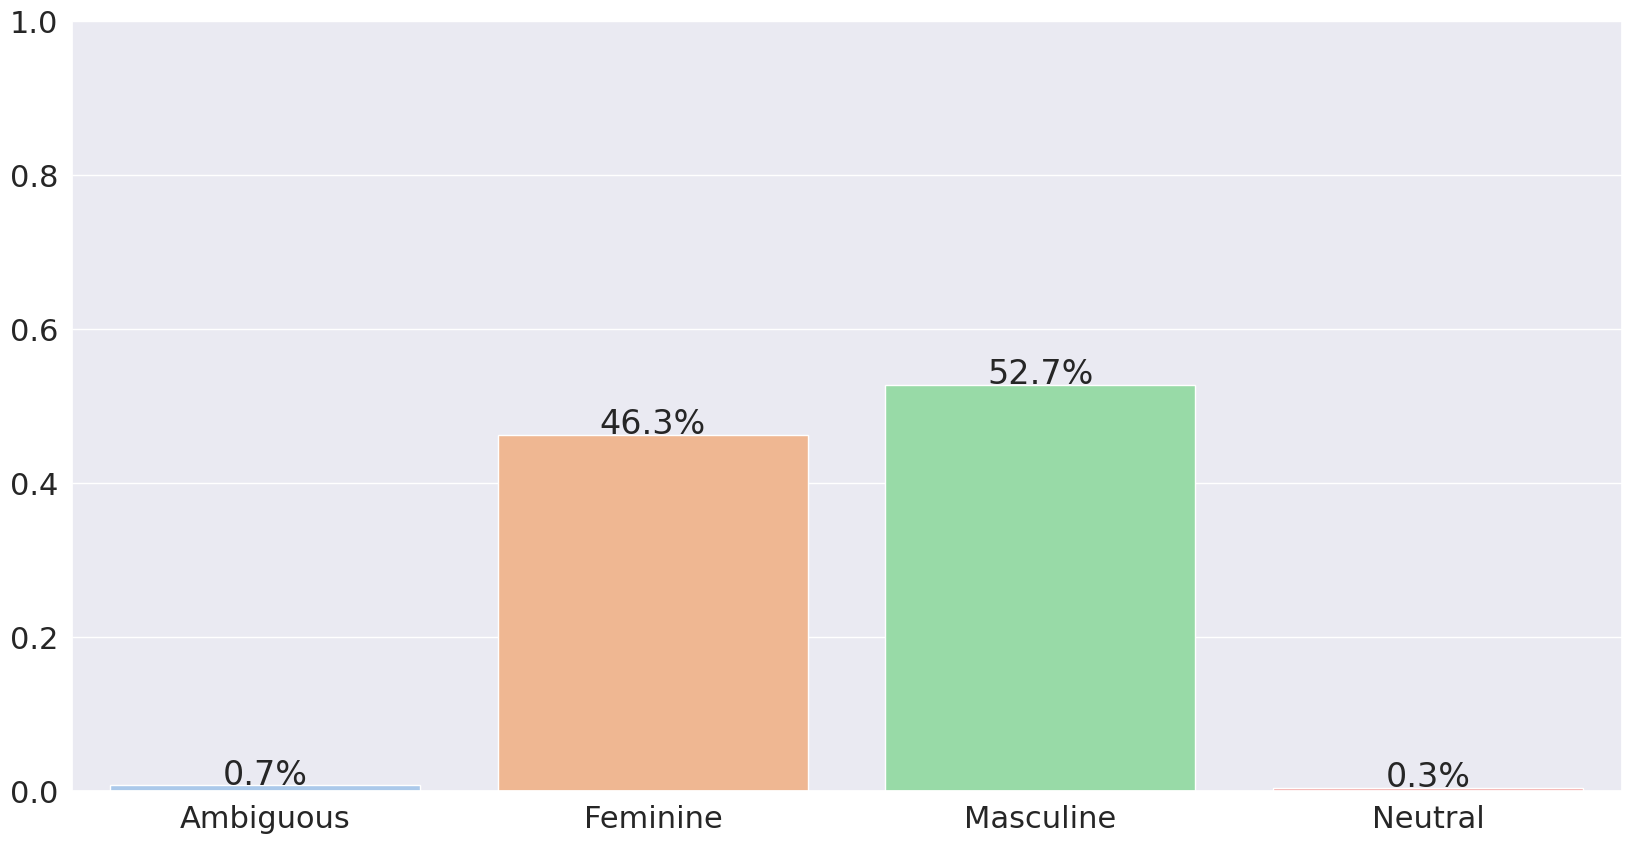

In [5]:
"""Nombre de générations par genre sur tout le corpus = ATTENTION, TOUS PROMPTS INCLUS Y COMPRIS NEUTRE/MASC/FEM"""
# TODO : FIX SCALE (X AXIS)
def exploration_donnees(dataset, label, gender, savefig=False, savecsv=False):
    # gender = féminin, masculin, undetermined, all => filtre pour voir résultats selon genre du prompt
    if gender == "all":
        dataset = dataset
    else:
        dataset = dataset[dataset["sex_prompt"] == gender]
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylim(0,1)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{gender}.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

# ON ALL PROMPTS
exploration_donnees(data_genre,label,"all",True)

/tmp/ipykernel_5241/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/fig/gender_distributions_féminin.png'

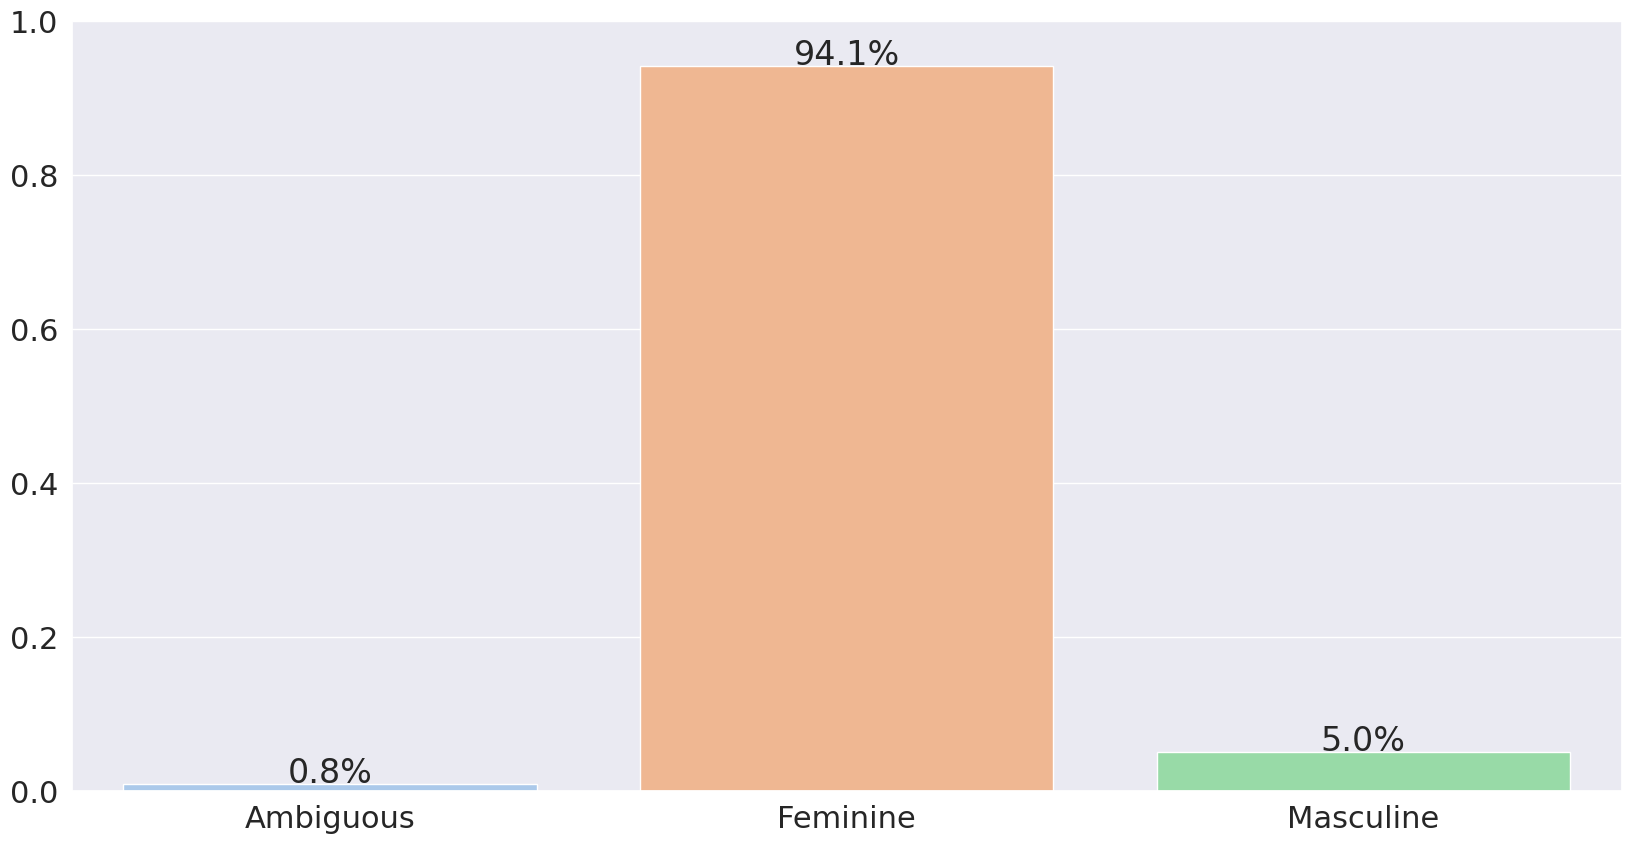

In [6]:
# FOR ALL FEMININE PROMPTS
exploration_donnees(data_genre,label,"féminin",True)

/tmp/ipykernel_5241/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/fig/gender_distributions_masculin.png'

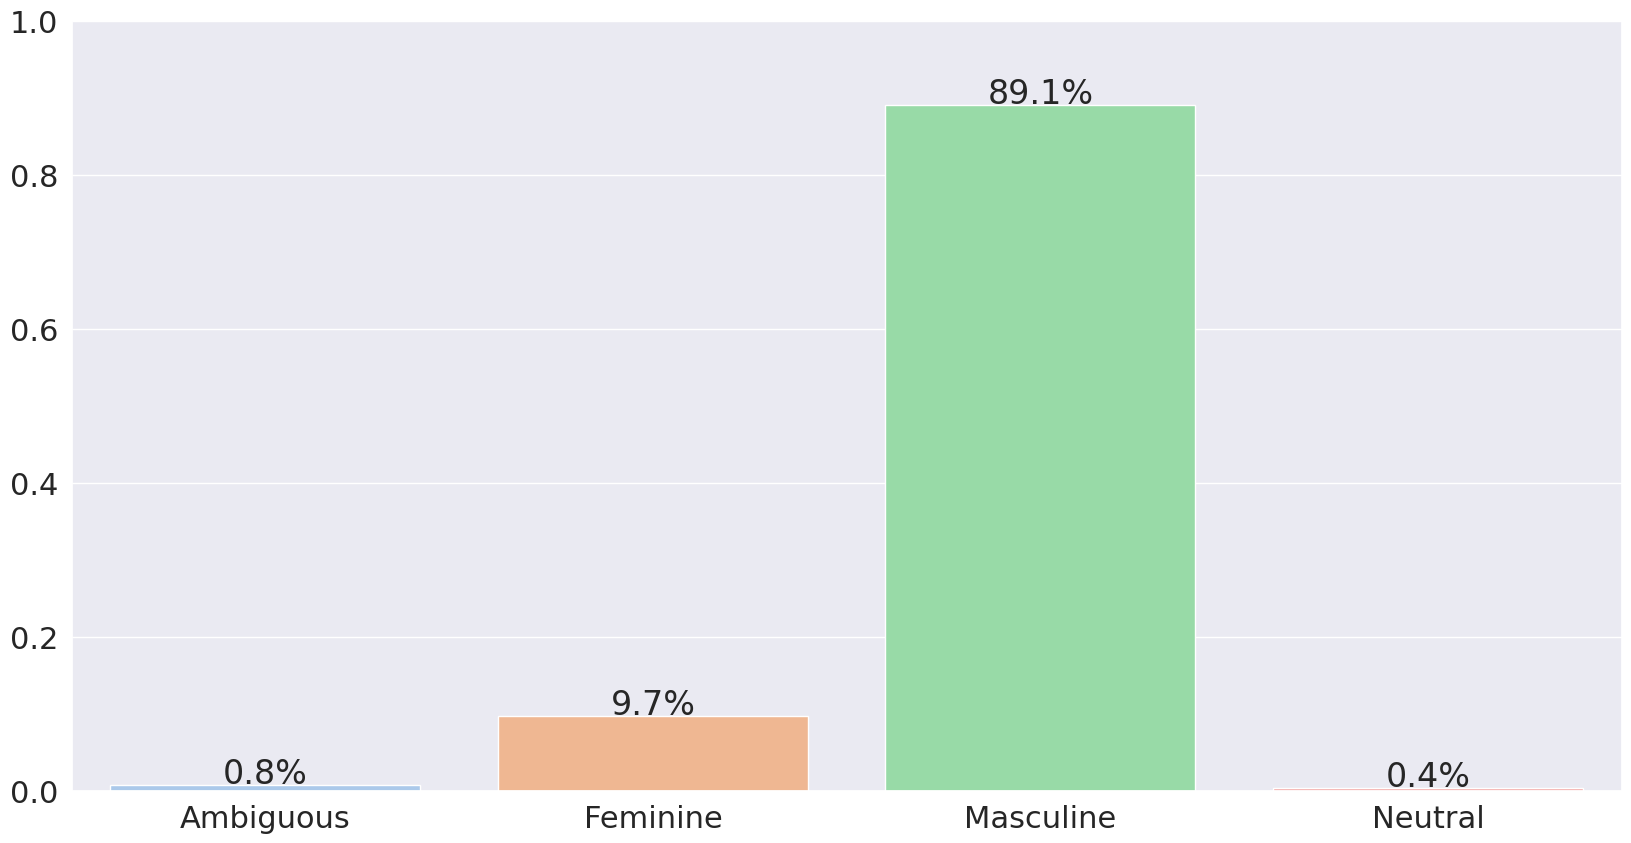

In [7]:
exploration_donnees(data_genre,label,"masculin",True)

/tmp/ipykernel_5241/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/fig/gender_distributions_neutre.png'

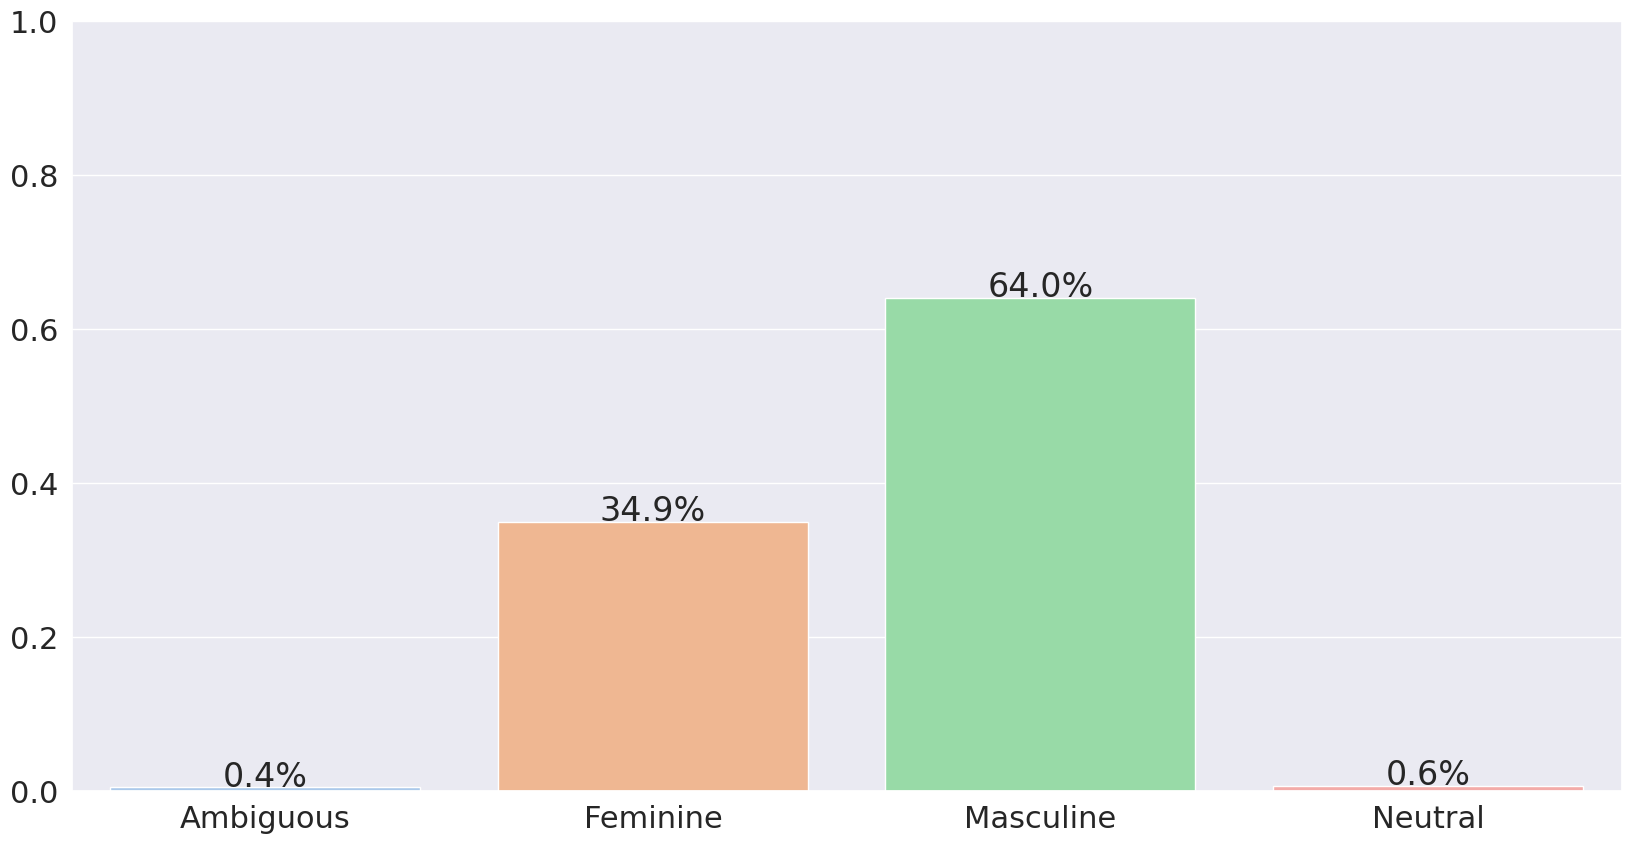

In [8]:
exploration_donnees(data_genre,label,"neutre",True)

Masculine    Feminine    Neutral    Ambiguous    model
-----------  ----------  ---------  -----------  -------------
53.7%        45.0%       0.7%       0.5%         bloom-7b1
57.9%        41.3%       0.5%       0.3%         bloom-1b1
49.8%        49.6%       0.2%       0.4%         vigogne-2-13b
49.6%        48.7%       0.1%       1.6%         BioMistral
52.5%        46.7%       0.2%       0.6%         vigogne-2-7b


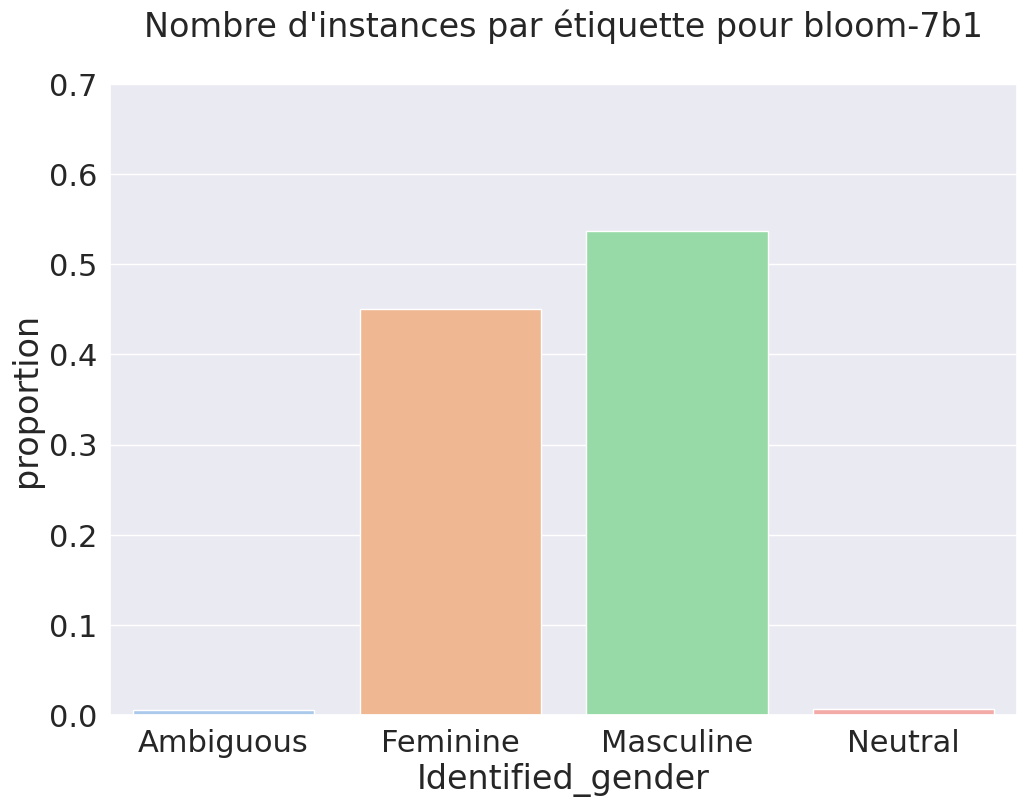

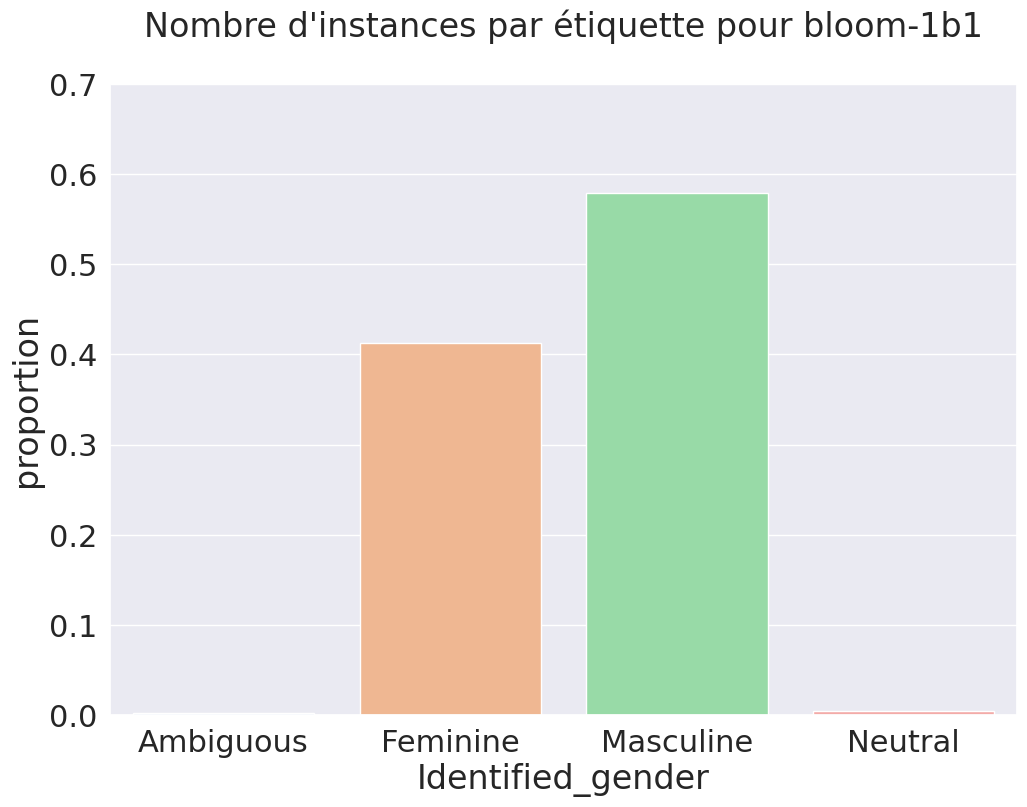

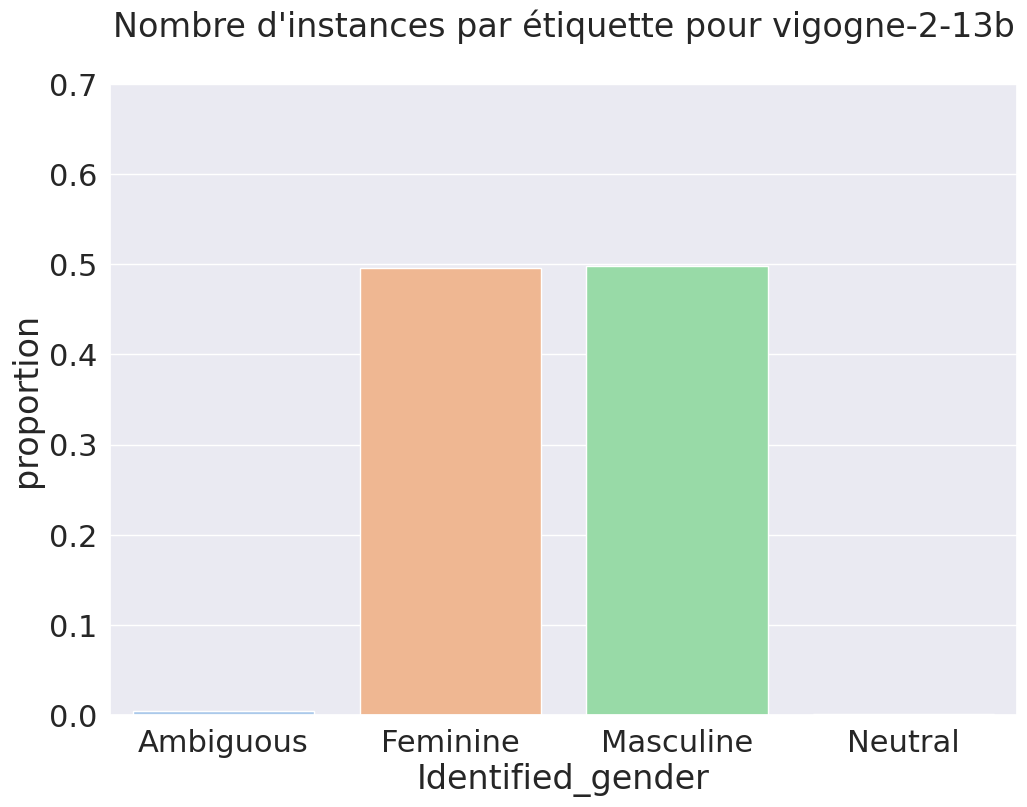

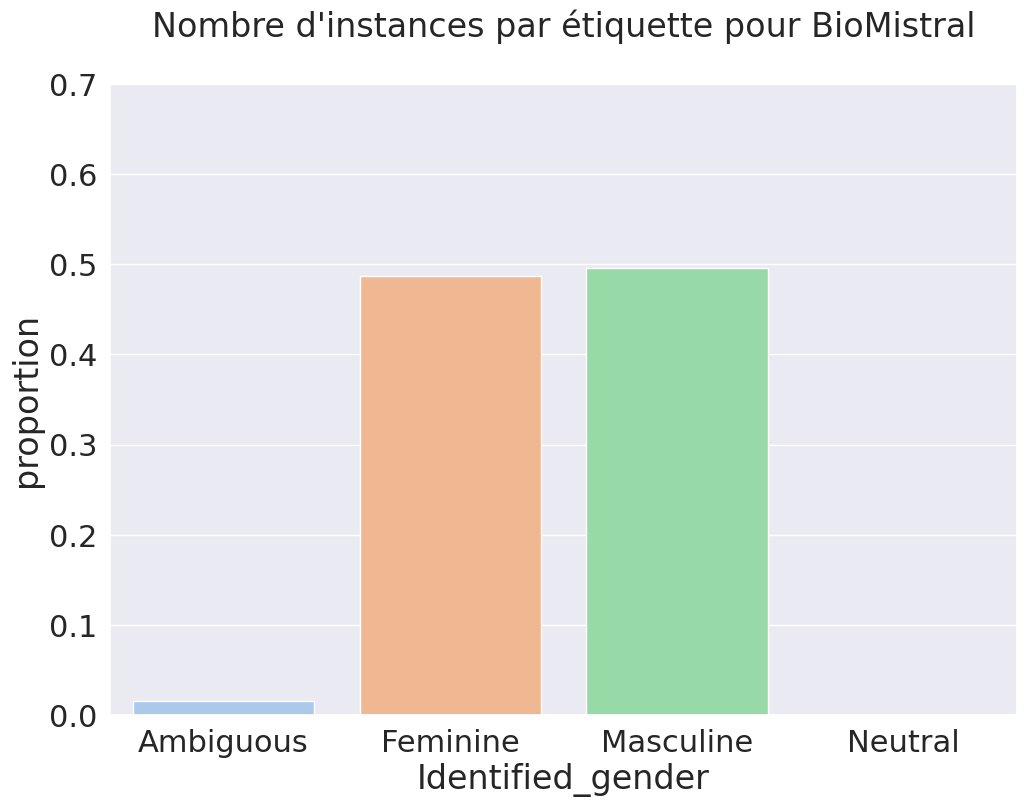

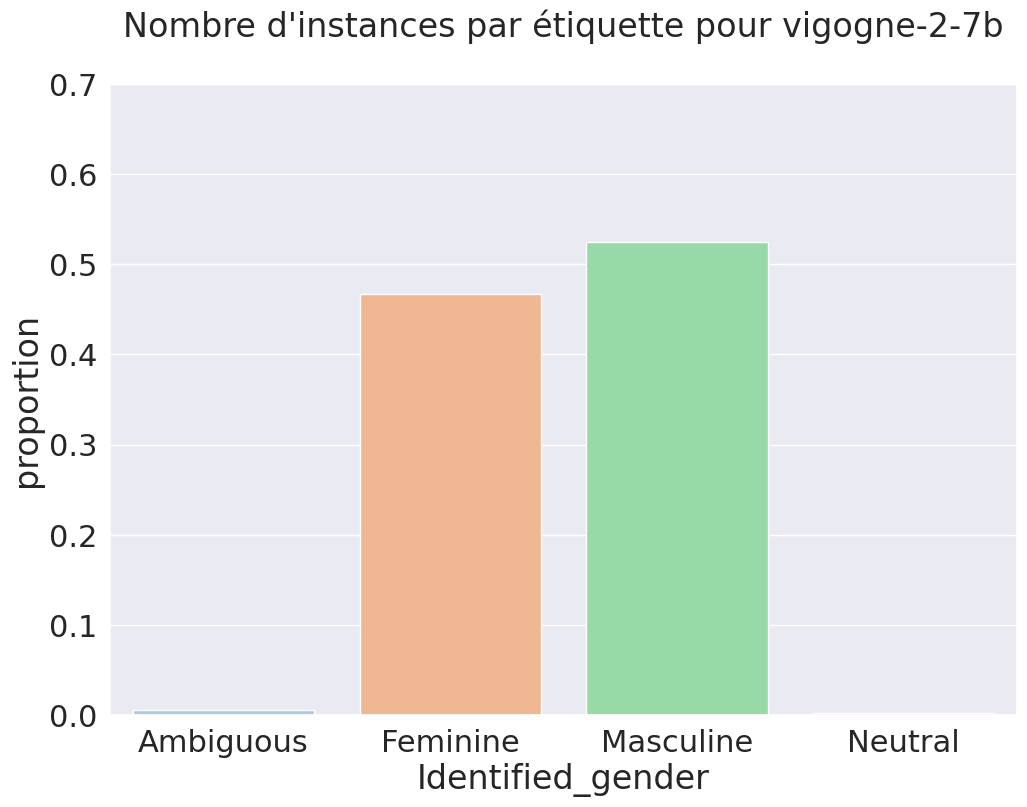

In [12]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Masculine': '53.7%', 'Feminine': '45.0%', 'Neutral': '0.7%', 'Ambiguous': '0.5%', 'model': 'bloom-7b1'}, {'Masculine': '57.9%', 'Feminine': '41.3%', 'Neutral': '0.5%', 'Ambiguous': '0.3%', 'model': 'bloom-1b1'}, {'Masculine': '49.8%', 'Feminine': '49.6%', 'Ambiguous': '0.4%', 'Neutral': '0.2%', 'model': 'vigogne-2-13b'}, {'Masculine': '49.6%', 'Feminine': '48.7%', 'Ambiguous': '1.6%', 'Neutral': '0.1%', 'model': 'BioMistral'}, {'Masculine': '52.5%', 'Feminine': '46.7%', 'Ambiguous': '0.6%', 'Neutral': '0.2%', 'model': 'vigogne-2-7b'}]
[{'Masculine': 52.7, 'Feminine': 46.260000000000005, 'Neutral': 0.33999999999999997, 'Ambiguous': 0.68}, {'Neutral': 0.7, 'Feminine': 45.0, 'Masculine': 53.7, 'Ambiguous': 0.5}, {'Neutral': 0.5, 'Feminine': 41.3, 'Masculine': 57.9, 'Ambiguous': 0.3}, {'Neutral': 0.2, 'Feminine': 49.6, 'Masculine': 49.8, 'Ambiguous': 0.4}, {'Neutral': 0.1, 'Feminine': 48.7, 'Masculine': 49.6, 'Ambiguous': 1.6}, {'Neutral': 0.2, 'Feminine': 46.7, 'Masculine': 52.5, 'Ambi

[]

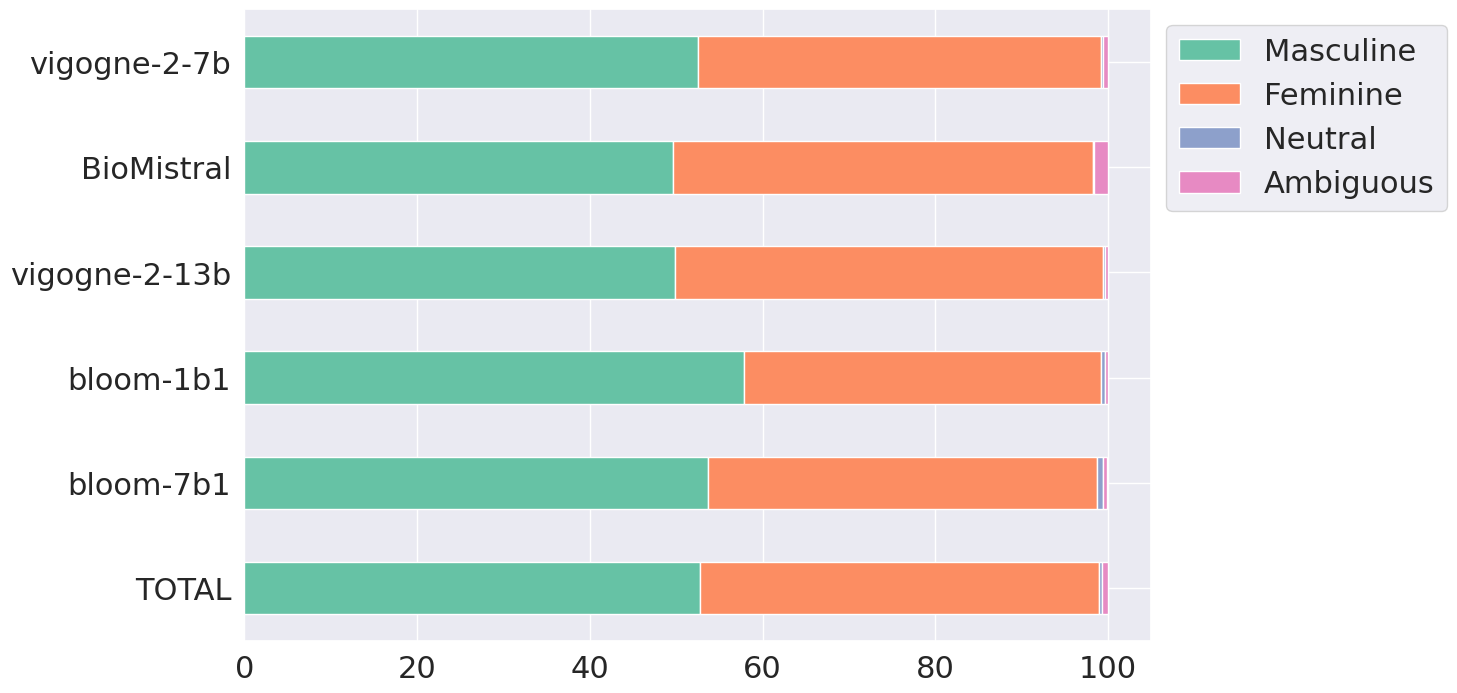

In [13]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [14]:
"""Nombre de générations par genre selon le domaine professionnel, pour les 10 domaines du corpus Référence
(pour pouvoir comparer avec les résultats sur les données annotées manuellement)"""

def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["pathologie"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"fig/gender_distributions_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["pathologie"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
59.0%        39.9%       1.0%         0.1%       colon
25.0%        74.6%       0.3%         0.1%       ovaire
64.1%        35.2%       0.4%         0.3%       infarctus
71.3%        27.1%       1.3%         0.3%       prostate
56.0%        43.1%       0.9%                    COVID-19
47.4%        51.9%       0.7%                    osteoporose
50.1%        49.3%       0.5%         0.1%       depression
26.8%        72.8%       0.4%                    sein
64.7%        32.5%       0.5%         2.2%       drepanocytose
62.5%        36.2%       1.0%         0.3%       vessie


In [15]:
table

[{'Masculine': '59.0%',
  'Feminine': '39.9%',
  'Ambiguous': '1.0%',
  'Neutral': '0.1%',
  'topic': 'colon'},
 {'Feminine': '74.6%',
  'Masculine': '25.0%',
  'Ambiguous': '0.3%',
  'Neutral': '0.1%',
  'topic': 'ovaire'},
 {'Masculine': '64.1%',
  'Feminine': '35.2%',
  'Ambiguous': '0.4%',
  'Neutral': '0.3%',
  'topic': 'infarctus'},
 {'Masculine': '71.3%',
  'Feminine': '27.1%',
  'Ambiguous': '1.3%',
  'Neutral': '0.3%',
  'topic': 'prostate'},
 {'Masculine': '56.0%',
  'Feminine': '43.1%',
  'Ambiguous': '0.9%',
  'topic': 'COVID-19'},
 {'Feminine': '51.9%',
  'Masculine': '47.4%',
  'Ambiguous': '0.7%',
  'topic': 'osteoporose'},
 {'Masculine': '50.1%',
  'Feminine': '49.3%',
  'Ambiguous': '0.5%',
  'Neutral': '0.1%',
  'topic': 'depression'},
 {'Feminine': '72.8%',
  'Masculine': '26.8%',
  'Ambiguous': '0.4%',
  'topic': 'sein'},
 {'Masculine': '64.7%',
  'Feminine': '32.5%',
  'Neutral': '2.2%',
  'Ambiguous': '0.5%',
  'topic': 'drepanocytose'},
 {'Masculine': '62.5%',
  

[]

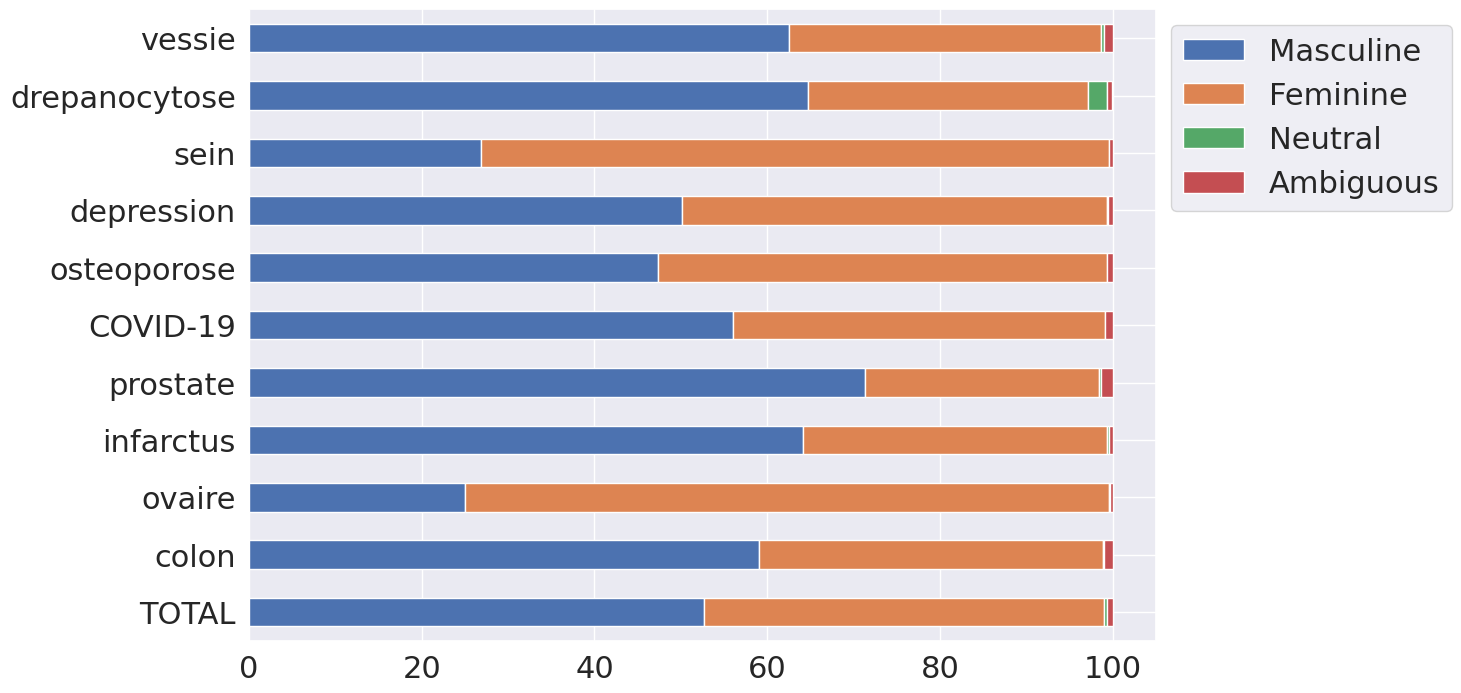

In [16]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
    if "Masculine" not in d:
        d["Masculine"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("bias_results/fig/auto_gender_per_topic_10.png",bbox_inches = "tight")
ax.plot()

In [17]:
table_new

[{'Masculine': 52.69,
  'Feminine': 46.26,
  'Neutral': 0.33999999999999997,
  'Ambiguous': 0.7},
 {'Neutral': 0.1, 'Feminine': 39.9, 'Masculine': 59.0, 'Ambiguous': 1.0},
 {'Neutral': 0.1, 'Feminine': 74.6, 'Masculine': 25.0, 'Ambiguous': 0.3},
 {'Neutral': 0.3, 'Feminine': 35.2, 'Masculine': 64.1, 'Ambiguous': 0.4},
 {'Neutral': 0.3, 'Feminine': 27.1, 'Masculine': 71.3, 'Ambiguous': 1.3},
 {'Neutral': 0.0, 'Feminine': 43.1, 'Masculine': 56.0, 'Ambiguous': 0.9},
 {'Neutral': 0.0, 'Feminine': 51.9, 'Masculine': 47.4, 'Ambiguous': 0.7},
 {'Neutral': 0.1, 'Feminine': 49.3, 'Masculine': 50.1, 'Ambiguous': 0.5},
 {'Neutral': 0.0, 'Feminine': 72.8, 'Masculine': 26.8, 'Ambiguous': 0.4},
 {'Neutral': 2.2, 'Feminine': 32.5, 'Masculine': 64.7, 'Ambiguous': 0.5},
 {'Neutral': 0.3, 'Feminine': 36.2, 'Masculine': 62.5, 'Ambiguous': 1.0}]

## Écart Genré

In [18]:
"""Calculer l'Écart Genré selon les modèles"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['pathologie']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

7 3


In [19]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 infarctus
4 vessie
5 colon
6 COVID-19
7 depression
8 osteoporose
9 sein
10 ovaire


In [20]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 infarctus
4 vessie
5 colon
6 COVID-19
7 depression


In [21]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 ovaire
2 sein
3 osteoporose


In [22]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

6.4300000000000015

In [23]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

In [24]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
71.3%        27.1%       1.3%         0.3%       prostate
64.7%        32.5%       0.5%         2.2%       drepanocytose
64.1%        35.2%       0.4%         0.3%       infarctus
62.5%        36.2%       1.0%         0.3%       vessie
59.0%        39.9%       1.0%         0.1%       colon
25.0%        74.6%       0.3%         0.1%       ovaire
26.8%        72.8%       0.4%                    sein
47.4%        51.9%       0.7%                    osteoporose


KeyError: 'Neutral'

In [26]:
means = {"total":mean_gap_total}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=round(mean_gap,3)
    
means

{'total': 6.4300000000000015,
 'bloom-7b1': 10.7,
 'bloom-1b1': 15.25,
 'vigogne-2-13b': -0.6,
 'BioMistral': 3.462,
 'vigogne-2-7b': 2.837}

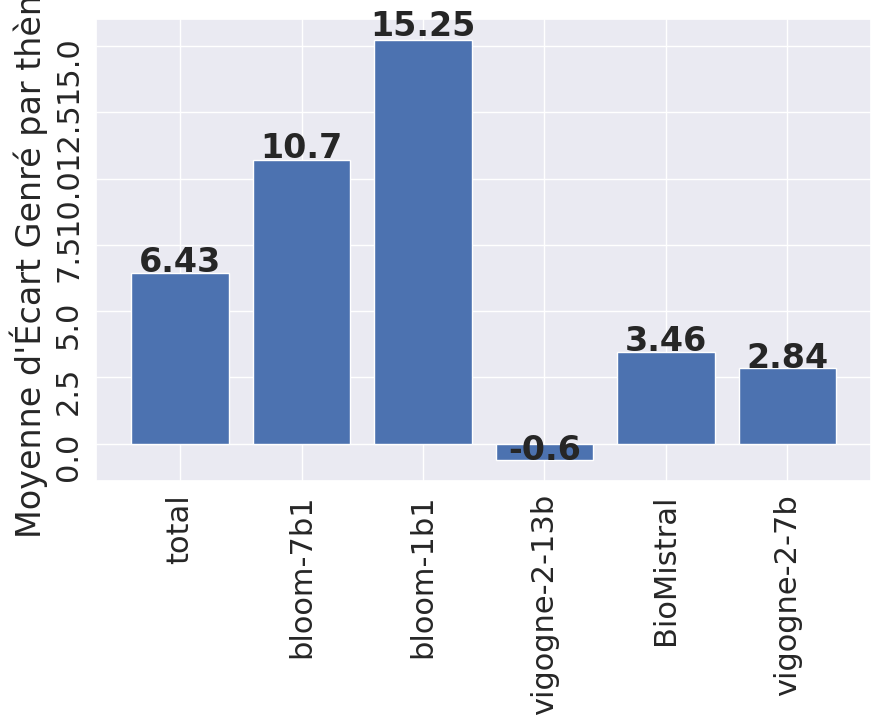

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [30]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["pathologie"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    #table_new = dic_list_noempty(table)
    table_new = table

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    #print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
59.0%        39.9%       1.0%         0.1%       colon
25.0%        74.6%       0.3%         0.1%       ovaire
64.1%        35.2%       0.4%         0.3%       infarctus
71.3%        27.1%       1.3%         0.3%       prostate
56.0%        43.1%       0.9%                    COVID-19
47.4%        51.9%       0.7%                    osteoporose
50.1%        49.3%       0.5%         0.1%       depression
26.8%        72.8%       0.4%                    sein
64.7%        32.5%       0.5%         2.2%       drepanocytose
62.5%        36.2%       1.0%         0.3%       vessie
[{'Masculine': '59.0%', 'Feminine': '39.9%', 'Ambiguous': '1.0%', 'Neutral': '0.1%', 'topic': 'colon'}, {'Feminine': '74.6%', 'Masculine': '25.0%', 'Ambiguous': '0.3%', 'Neutral': '0.1%', 'topic': 'ovaire'}, {'Masculine': '64.1%', 'Feminine': '35.2%', 'Ambiguous': '0.4%', 'Neutral': '0.3%', 'topic': '

TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Croisement proportions genre par modèle ET par domaine professionnel


 bloom-7b1
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
69.3%        29.7%       1.0%         prostate
68.7%        30.3%       1.0%         vessie
64.3%        28.7%                    drepanocytose  7.0%
65.7%        34.3%                    infarctus
60.0%        38.7%       1.3%         colon
57.3%        42.7%                    osteoporose
53.3%        45.7%       1.0%         COVID-19
24.0%        75.3%       0.7%         ovaire
28.0%        72.0%                    sein
46.3%        53.0%       0.3%         depression     0.3%

 bloom-1b1
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
64.3%        35.0%       0.7%         colon
64.3%        35.3%                    prostate       0.3%
60.7%        35.3%       0.3%         drepanocytose  3.7%
61.0%        38.7%       0.3%         COVID-19
61.0%        39.0%                  

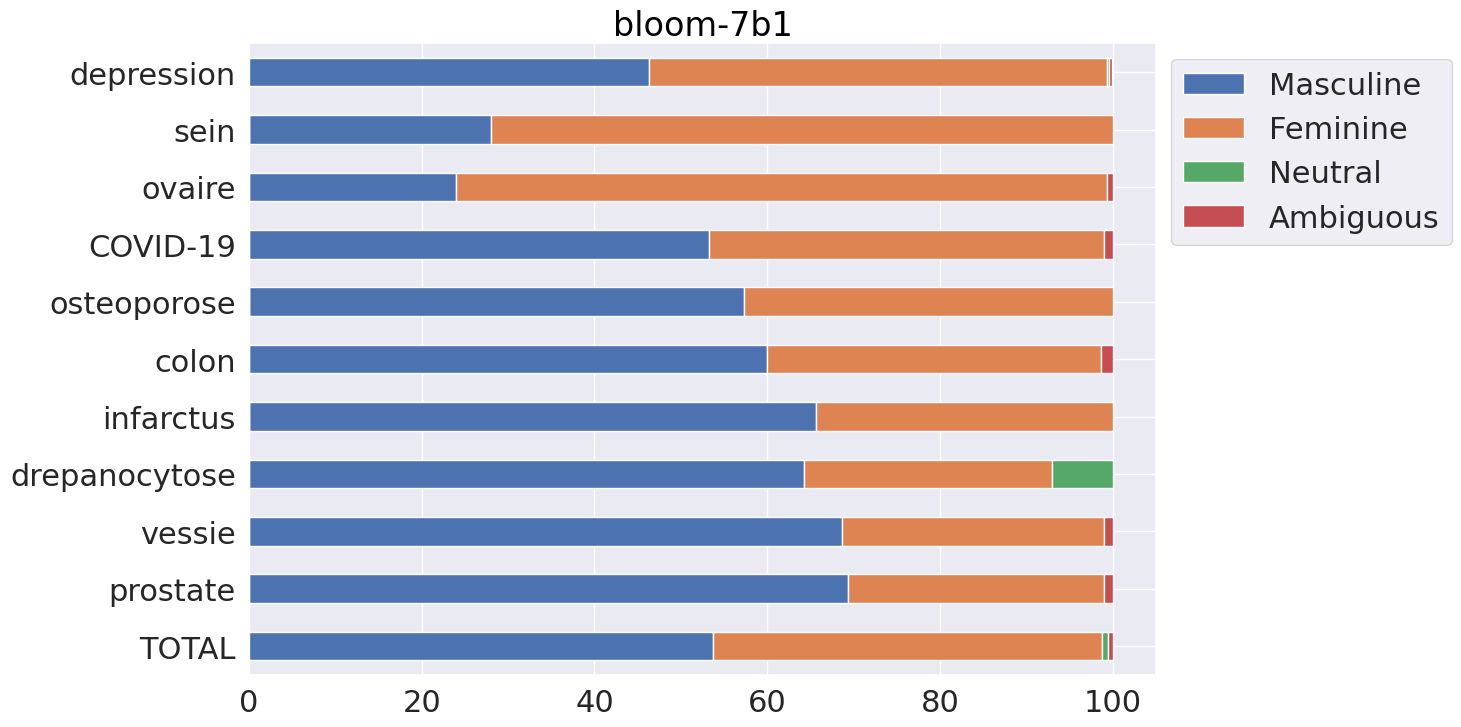

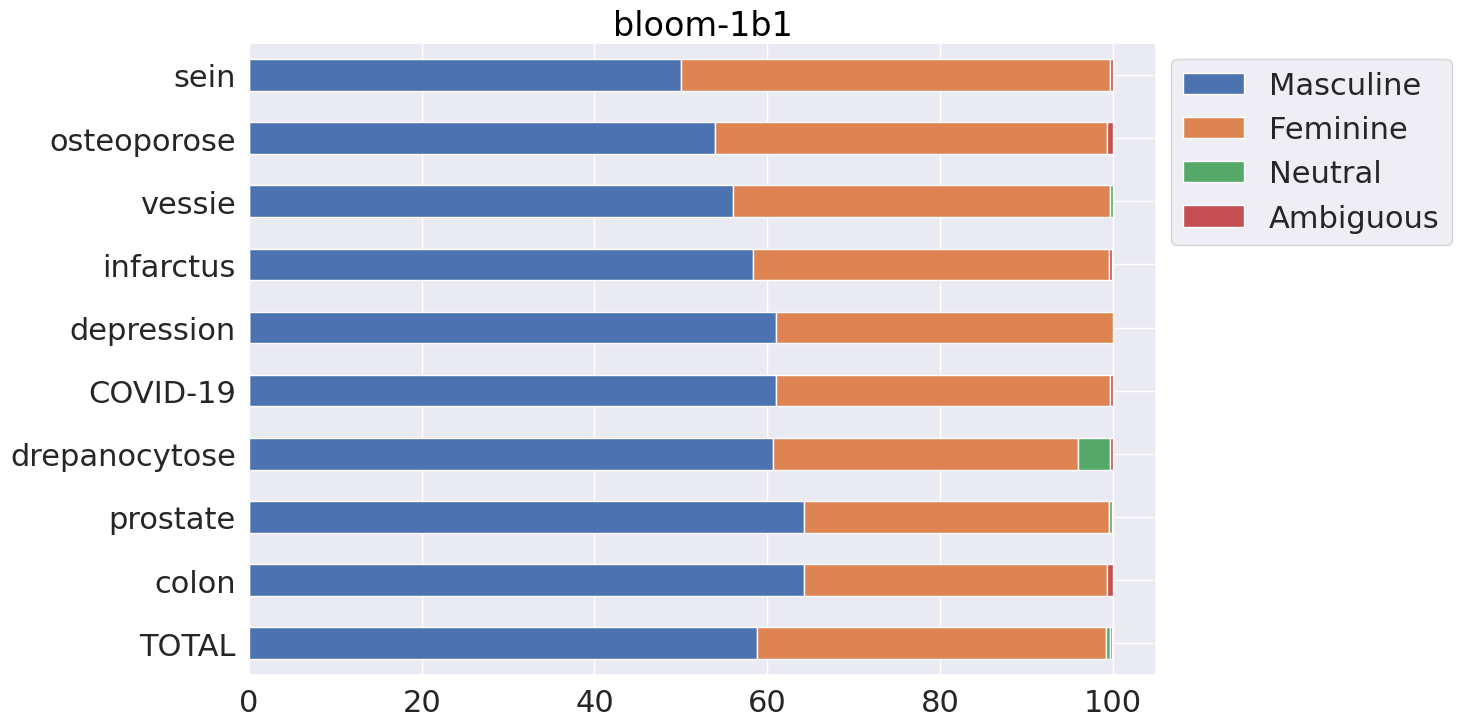

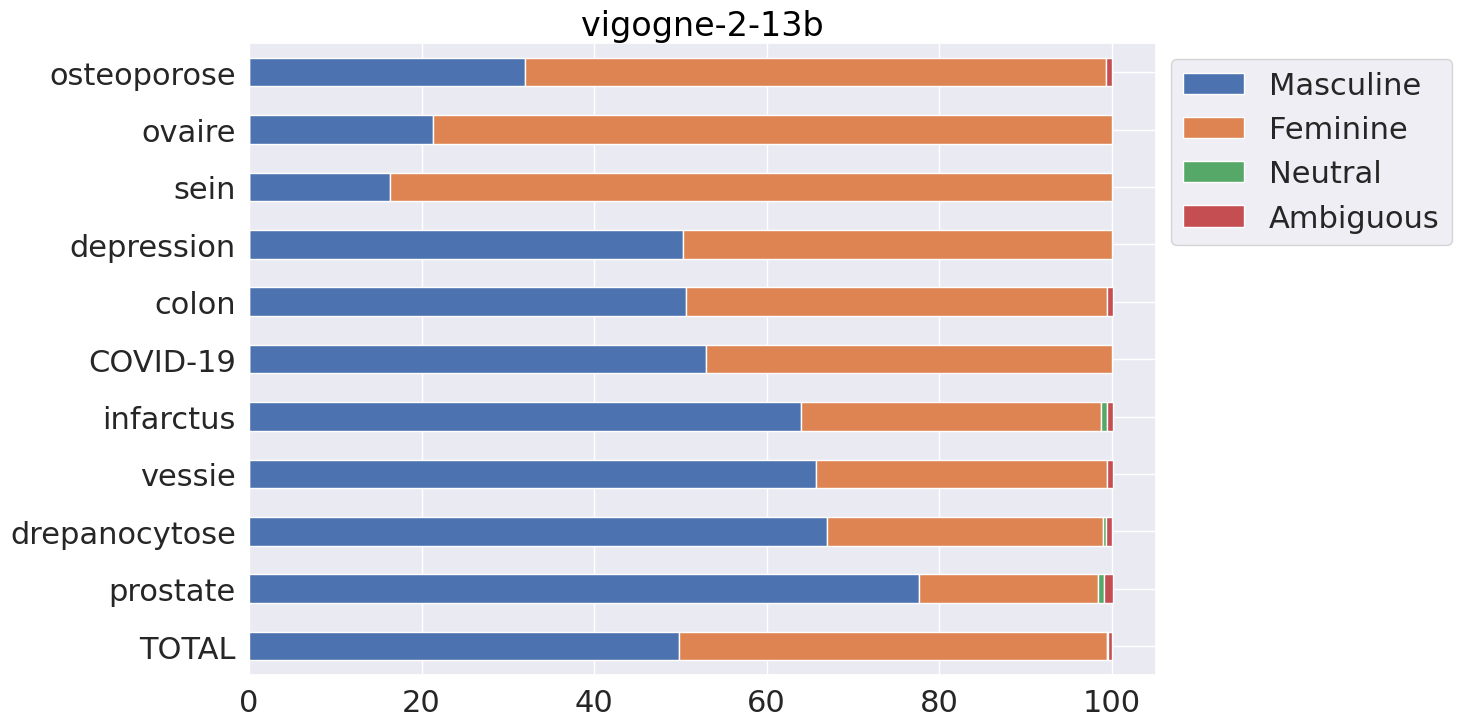

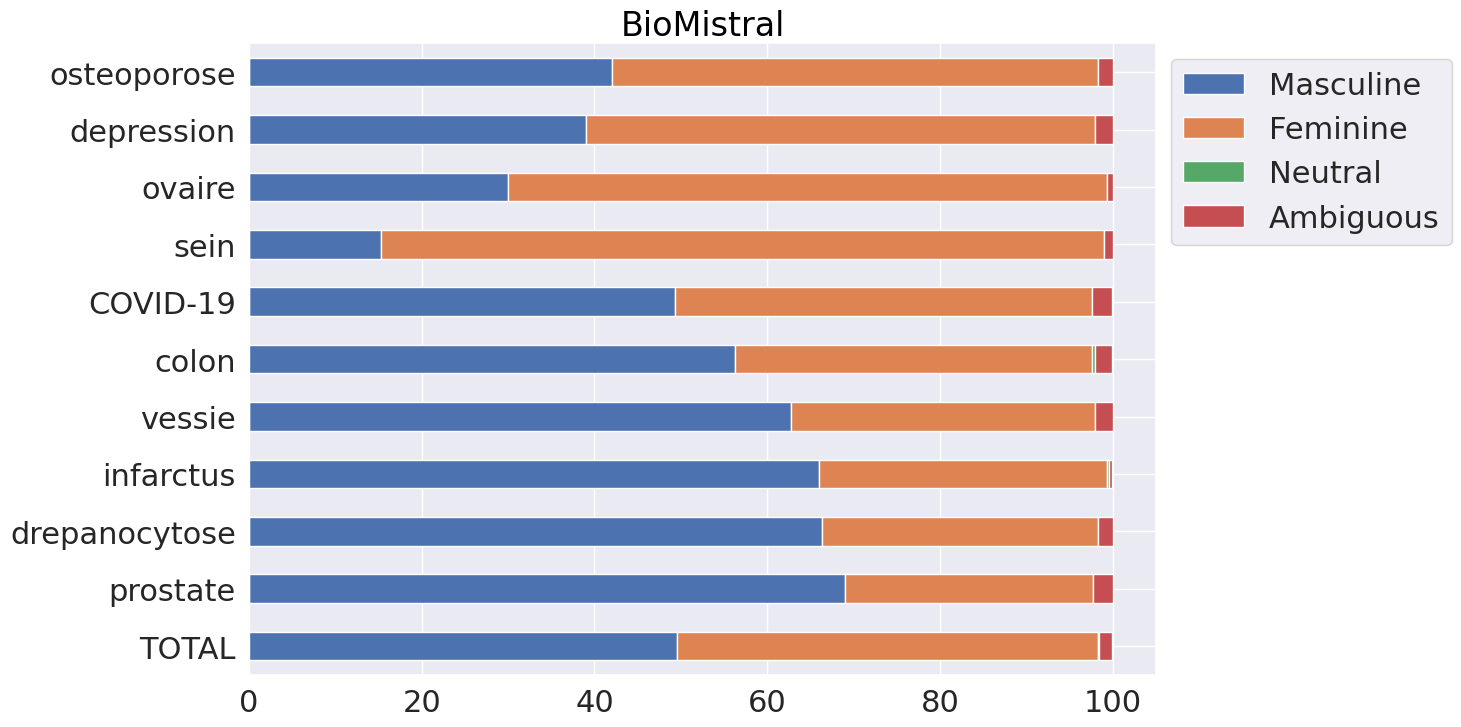

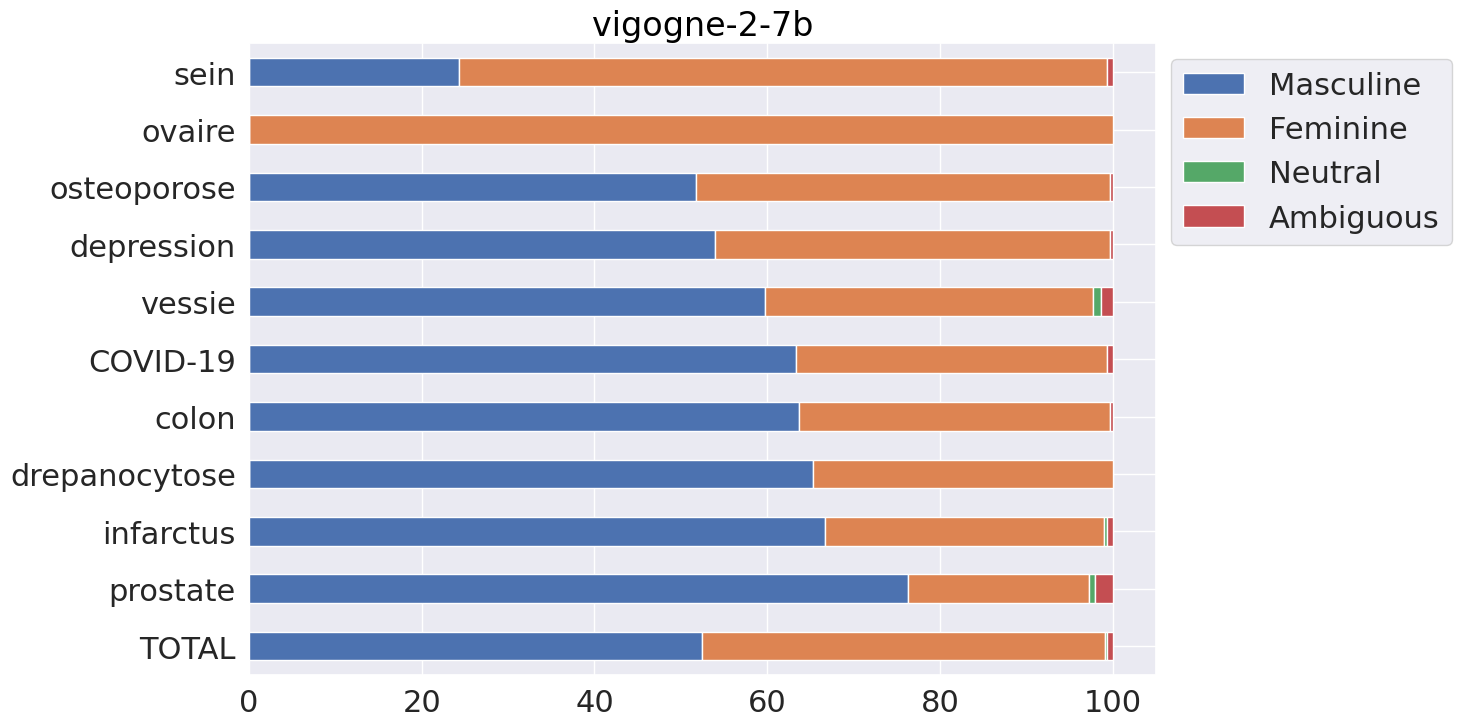

In [34]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["pathologie"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["pathologie"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    #topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 prostate
Masculine    Feminine    Ambiguous    model          Neutral
-----------  ----------  -----------  -------------  ---------
69.3%        29.7%       1.0%         bloom-7b1
64.3%        35.3%                    bloom-1b1      0.3%
77.7%        20.7%       1.0%         vigogne-2-13b  0.7%
69.0%        28.7%       2.3%         BioMistral
76.3%        21.0%       2.0%         vigogne-2-7b   0.7%

 infarctus
Masculine    Feminine    model          Ambiguous    Neutral
-----------  ----------  -------------  -----------  ---------
65.7%        34.3%       bloom-7b1
58.3%        41.3%       bloom-1b1      0.3%
64.0%        34.7%       vigogne-2-13b  0.7%         0.7%
66.0%        33.3%       BioMistral     0.3%         0.3%
66.7%        32.3%       vigogne-2-7b   0.7%         0.3%

 drepanocytose
Masculine    Feminine    Neutral    model          Ambiguous
-----------  ----------  ---------  -------------  -----------
64.3%        28.7%       7.0%       bloom-7b1
60.7%        35.3%

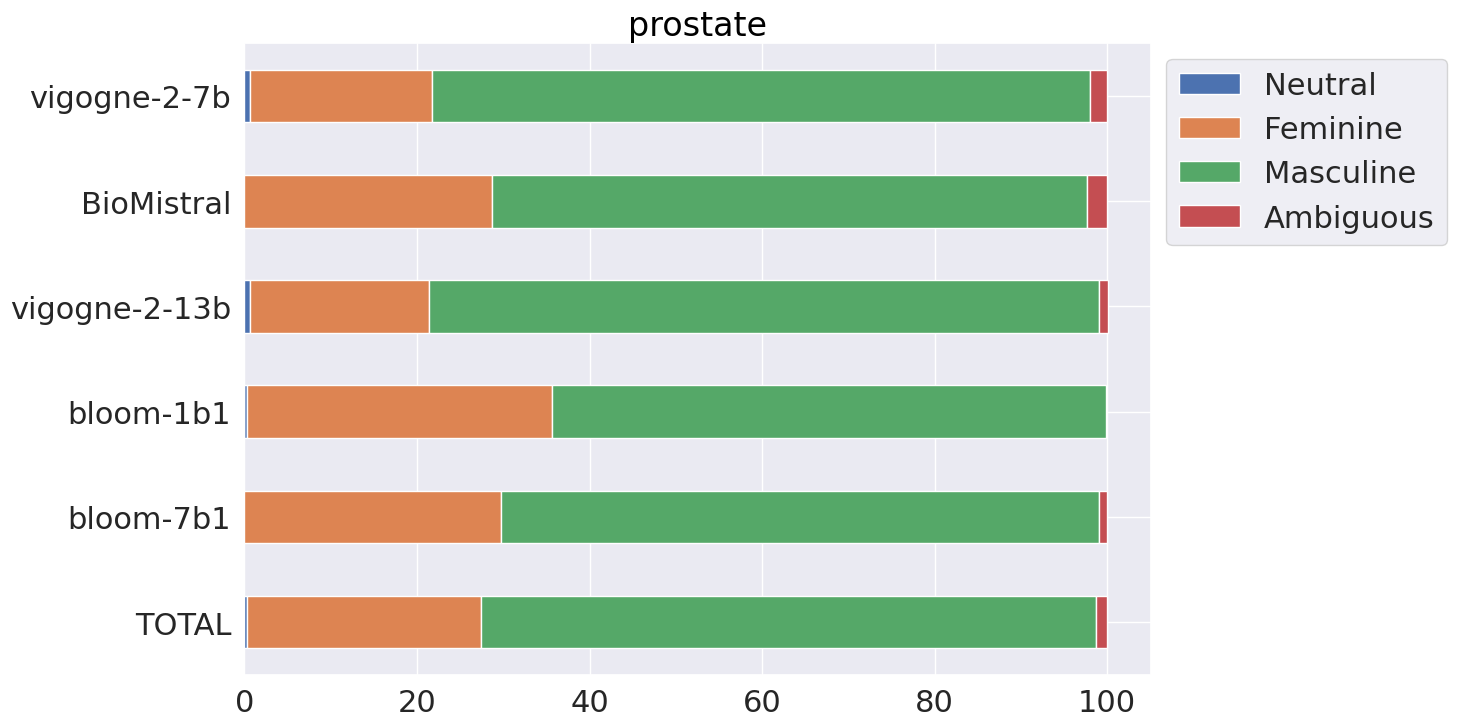

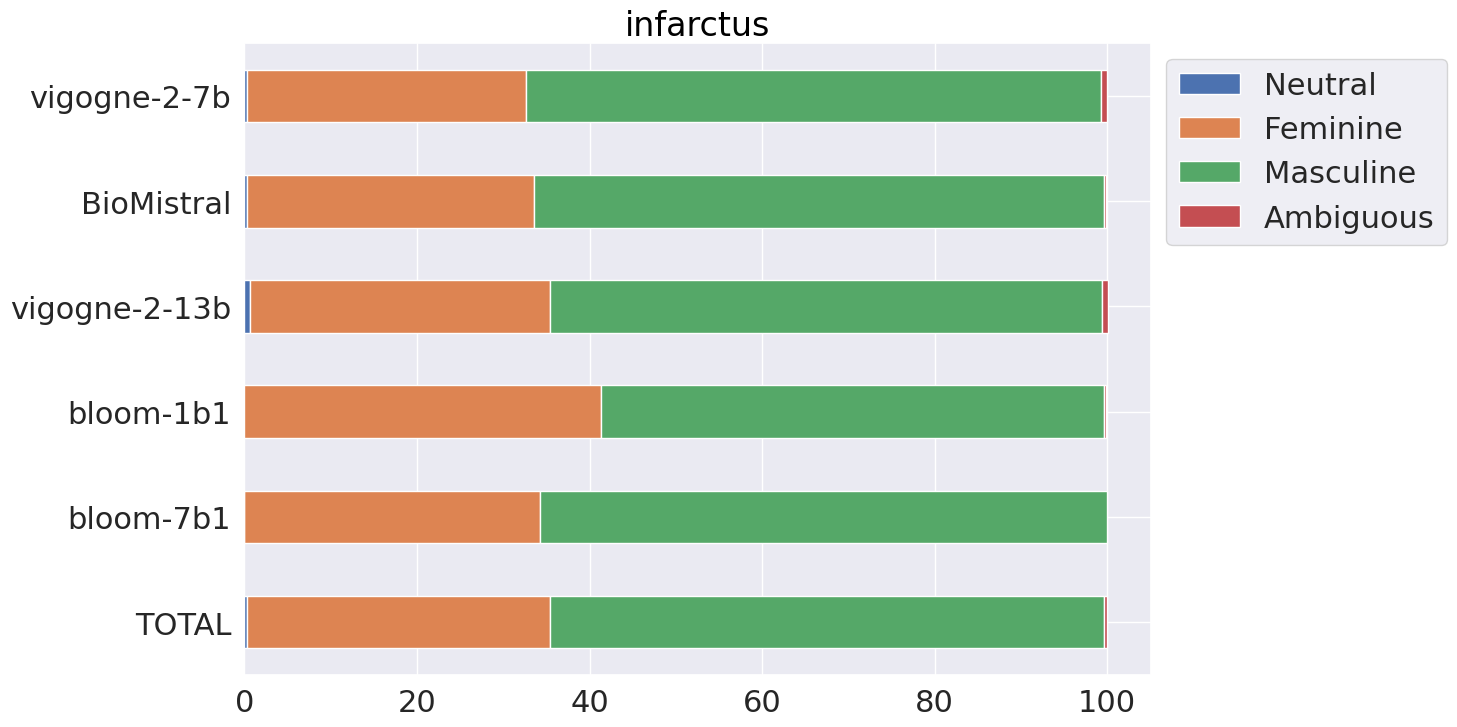

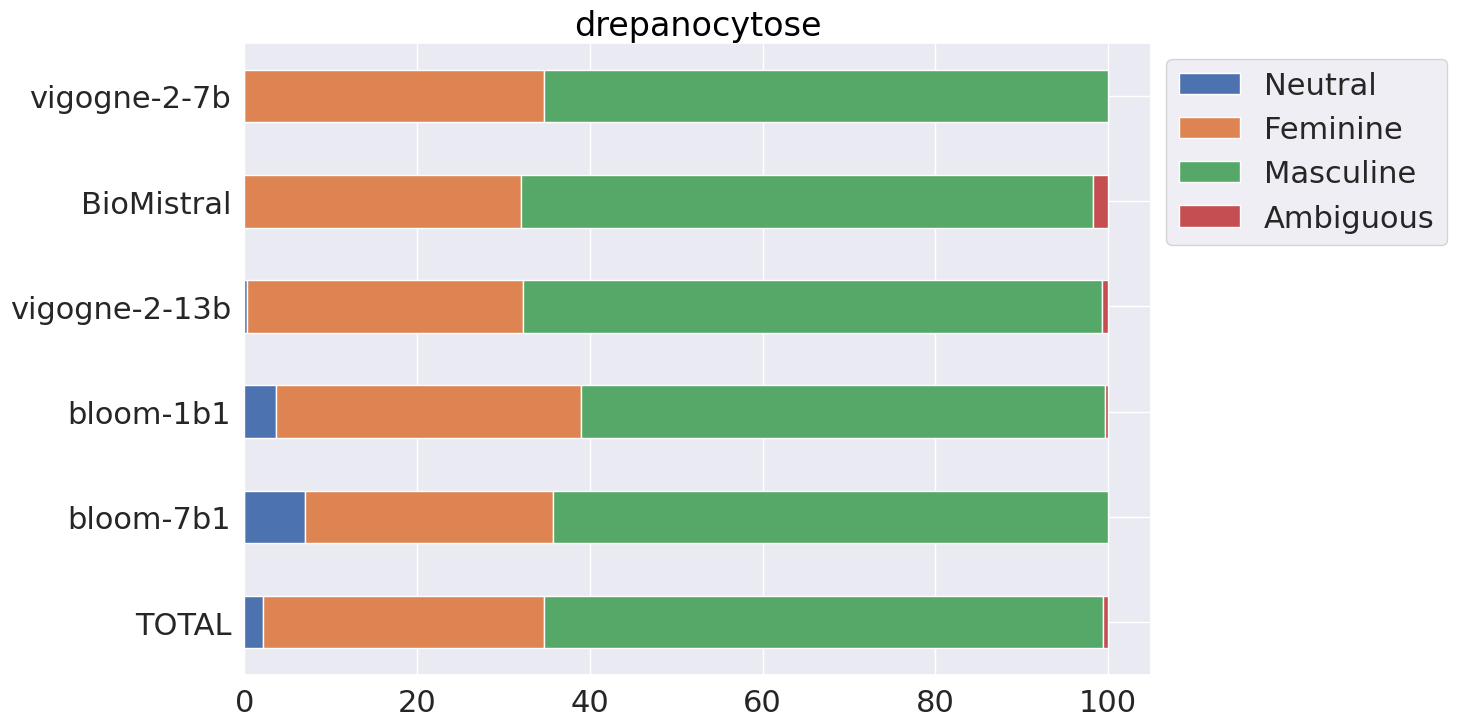

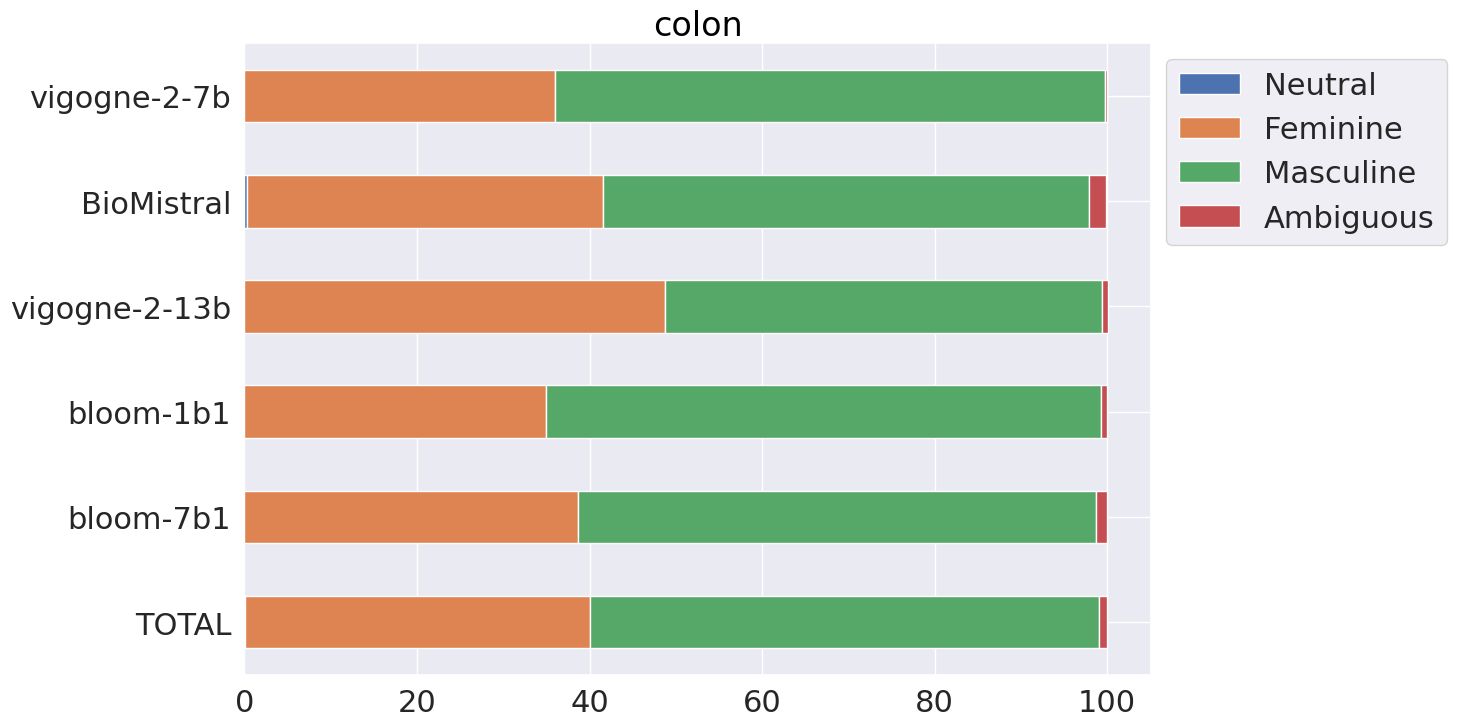

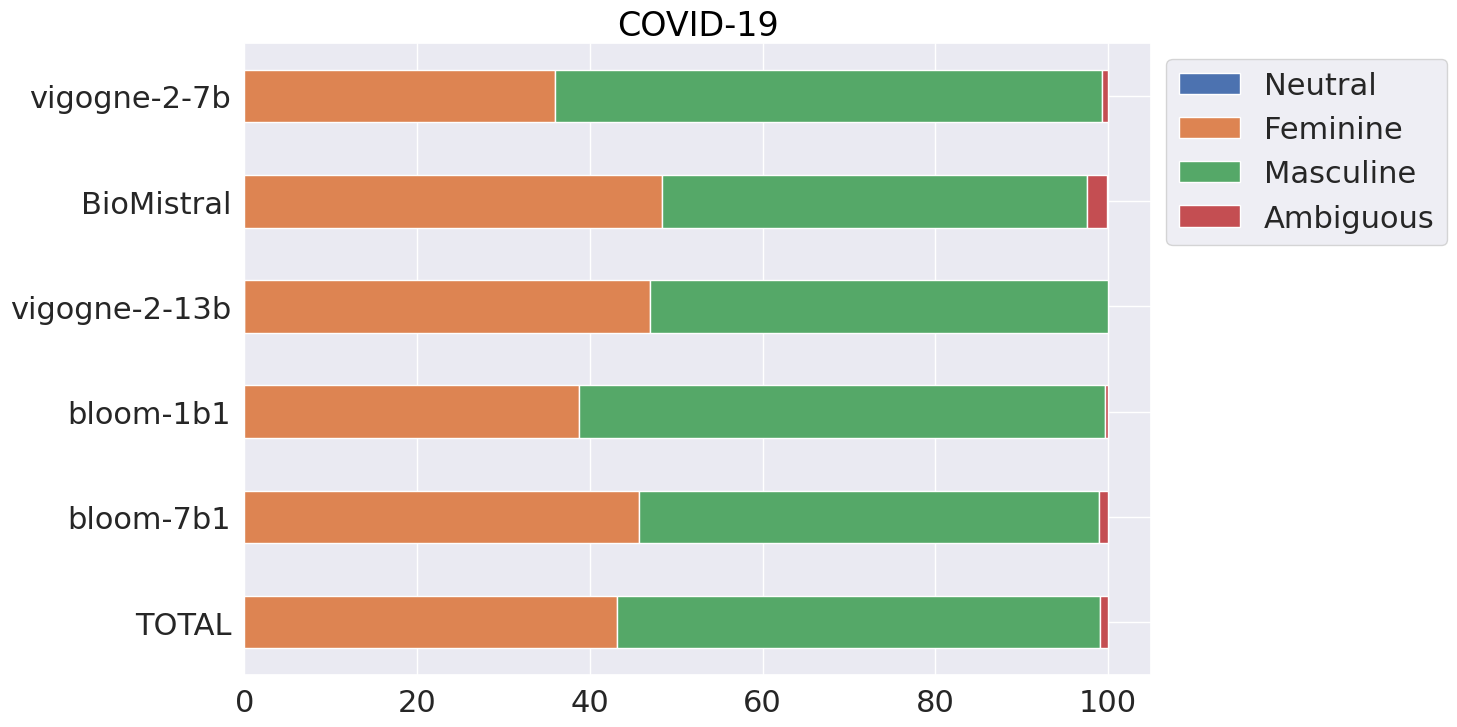

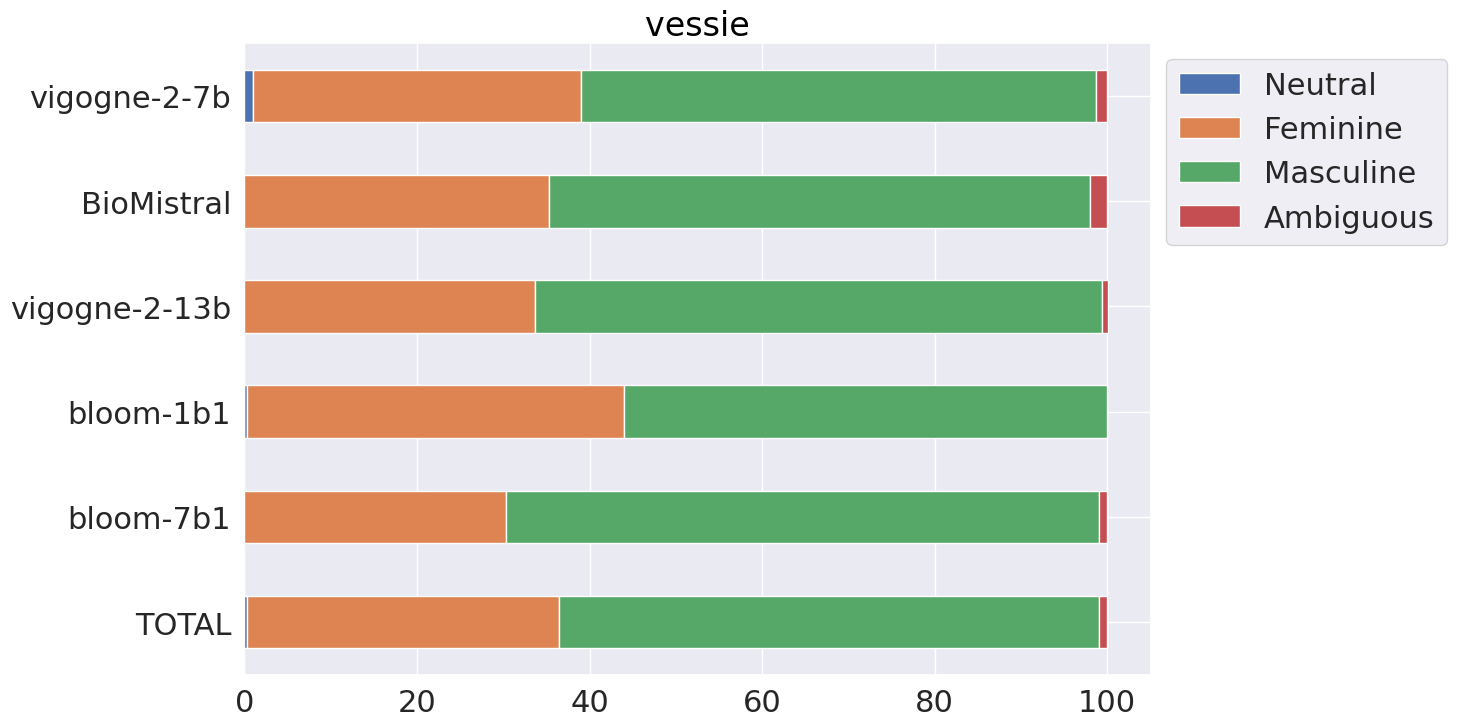

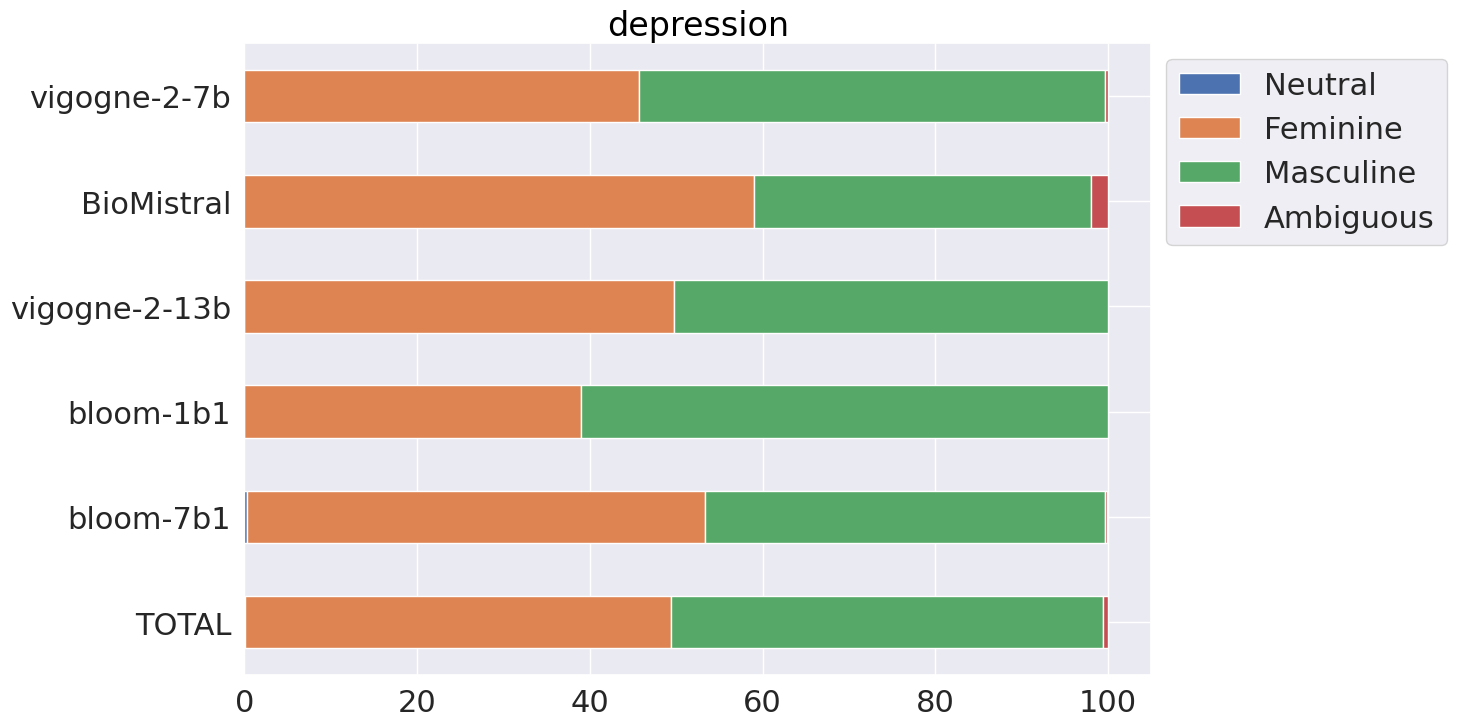

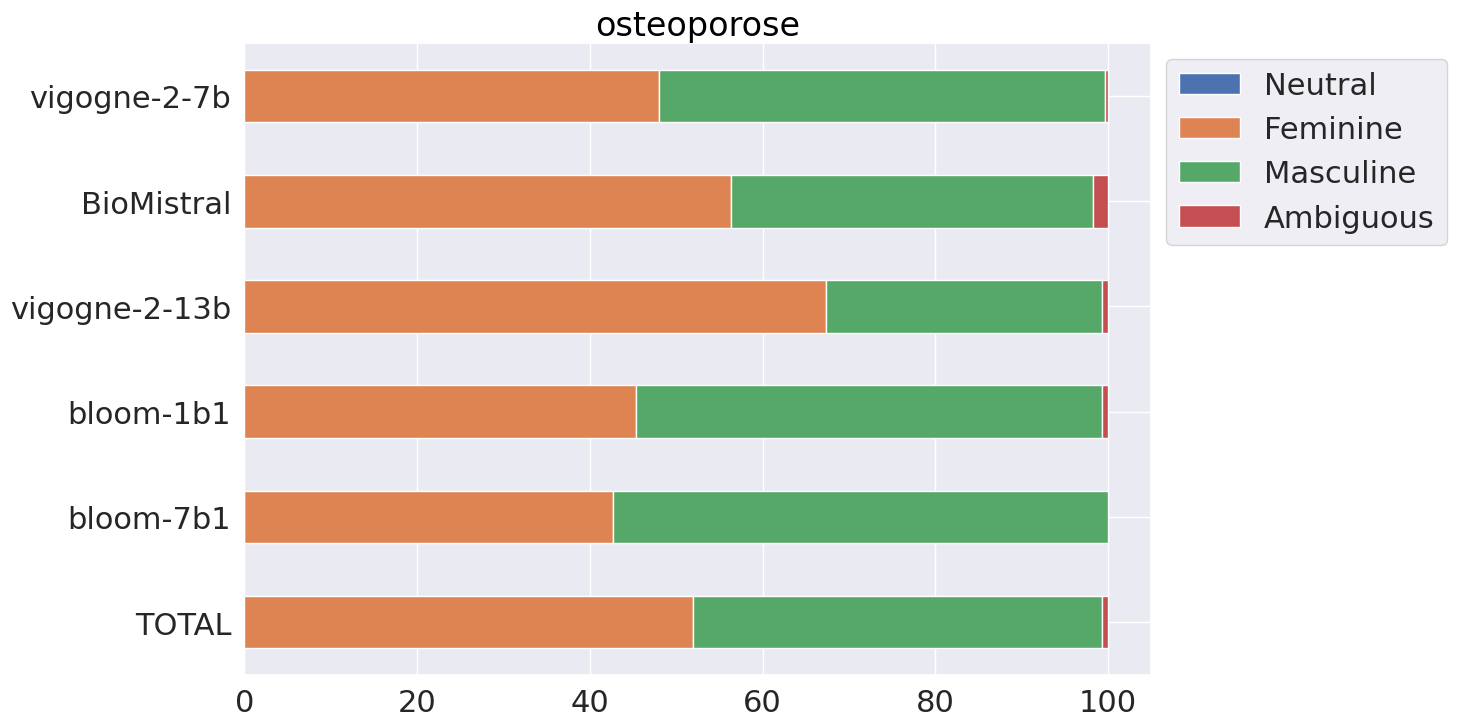

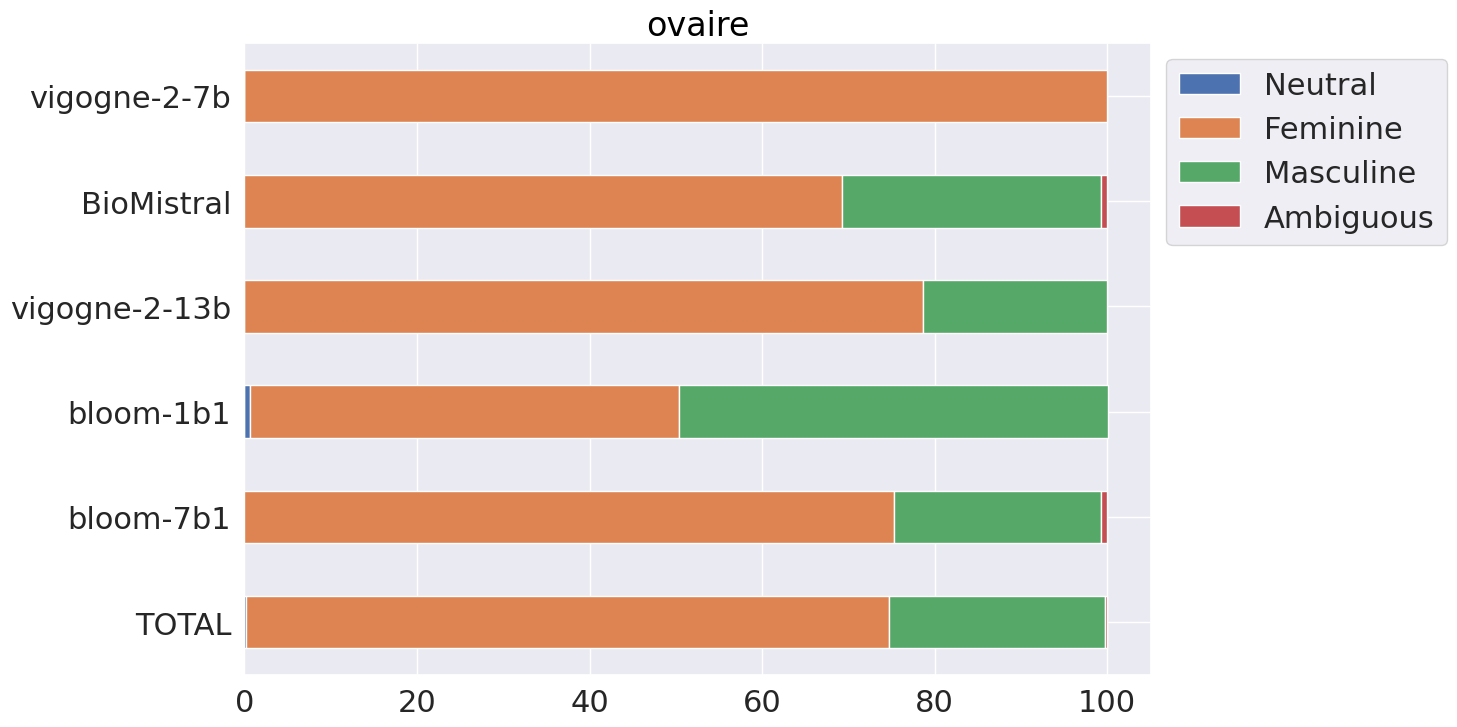

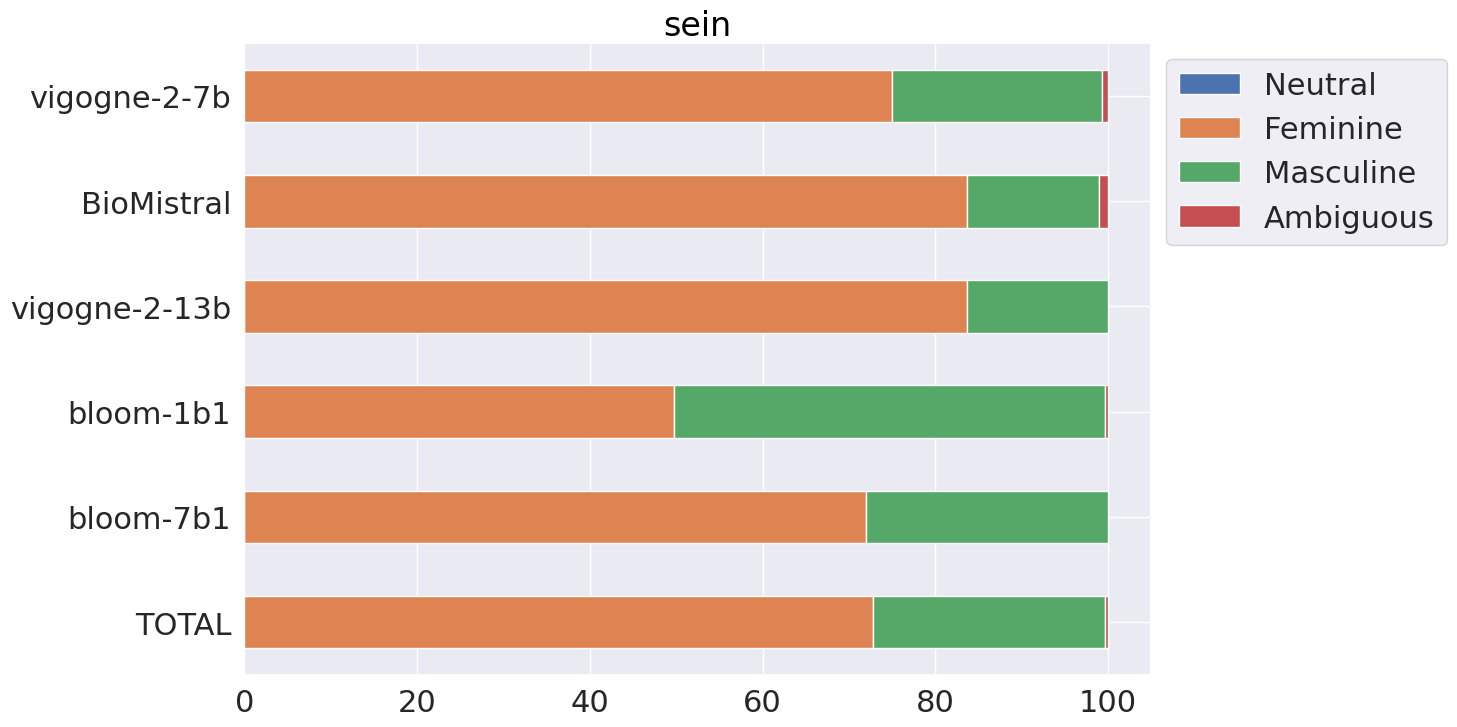

In [36]:
"""Ordre par topic, puis par modèle"""

"""ATTENTION CHANGEMENT DE COULEURS, À CORRIGER #TODO"""

#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [38]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["generation"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['generation'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['generation'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  -------------
5070.37  5087.98   5183.73   4992.75  5083.71  bloom-7b1
5281.33  5263.11   5030.47   5345.38  5230.07  bloom-1b1
3807.99  3752.81   3737      3841.85  3784.91  vigogne-2-13b
3776.8   3670.8    3665      3809.42  3730.5   BioMistral
3794.38  3740.06   3841.67   3782.79  3789.72  vigogne-2-7b

Word
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  -------------
791.305  791.542   818.136   761.938  790.73   bloom-7b1
829.825  819.838   790.667   819.125  814.863  bloom-1b1
572.217  561.803   526.6     524.923  546.386  vigogne-2-13b
558.758  547.419   532       565.729  550.976  BioMistral
563.095  556.513   520.167   552.947  548.18   vigogne-2-7b

Unique word
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  -------------
133.637  140.691   117.818   135.5    131.912  b

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [248]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm/global_{genre}.txt", "w") as f:
        f.write(str(list(df_genre["output"])))